In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("loans_dataset.csv")

In [ ]:
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


Part A: Data Preparation
A: Filtering the Dataset

In [ ]:
Filter_df= [
    "interest_rate",
    "verified_income",
    "debt_to_income",
    "total_credit_utilized",
    "total_credit_limit",
    "public_record_bankrupt",
    "loan_purpose",
    "term",
    "inquiries_last_12m",
    "issue_month",
    "annual_income",
    "loan_amount",
    "grade",
    "emp_length",
    "homeownership"
]

In [ ]:
New_df = df[Filter_df]

In [ ]:
New_df.describe().T

,count,mean,std,min,25%,50%,75%,max
interest_rate,10000.0,12.427524,5.001105,5.31,9.4300,11.98,15.0500,30.94
debt_to_income,9976.0,19.308192,15.004851,0.00,11.0575,17.57,25.0025,469.09
total_credit_utilized,10000.0,51049.063100,53636.731172,0.00,19185.5000,36927.00,65421.0000,942456.00
total_credit_limit,10000.0,183606.230400,187632.707777,0.00,51593.7500,114667.00,267550.0000,3386034.00
public_record_bankrupt,10000.0,0.123800,0.337172,0.00,0.0000,0.00,0.0000,3.00
term,10000.0,43.272000,11.029877,36.00,36.0000,36.00,60.0000,60.00
inquiries_last_12m,10000.0,1.958200,2.380130,0.00,0.0000,1.00,3.0000,29.00
annual_income,10000.0,79222.148412,64734.290492,0.00,45000.0000,65000.00,95000.0000,2300000.00
loan_amount,10000.0,16361.922500,10301.956759,1000.00,8000.0000,14500.00,24000.0000,40000.00
emp_length,9183.0,5.930306,3.703734,0.00,2.0000,6.00,10.0000,10.00


B:Remaining Variables

In [ ]:
New_df = New_df.rename(columns={'inquiries_last_12m' : 'credit_checks'})

In [ ]:
New_df

,interest_rate,verified_income,debt_to_income,total_credit_utilized,total_credit_limit,public_record_bankrupt,loan_purpose,term,credit_checks,issue_month,annual_income,loan_amount,grade,emp_length,homeownership
0,14.07,Verified,18.01,38767,70795,0,moving,60,6,Mar-2018,90000.0,28000,C,3.0,MORTGAGE
1,12.61,Not Verified,5.04,4321,28800,1,debt_consolidation,36,1,Feb-2018,40000.0,5000,C,10.0,RENT
2,17.09,Source Verified,21.15,16000,24193,0,other,36,4,Feb-2018,40000.0,2000,D,3.0,RENT
3,6.72,Not Verified,10.16,4997,25400,0,debt_consolidation,36,0,Jan-2018,30000.0,21600,A,1.0,RENT
4,14.07,Verified,57.96,52722,69839,0,credit_card,36,7,Mar-2018,35000.0,23000,C,10.0,RENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.35,Source Verified,22.28,77963,199195,1,other,36,5,Jan-2018,108000.0,24000,A,10.0,RENT
9996,19.03,Verified,32.38,101571,382061,0,debt_consolidation,36,1,Feb-2018,121000.0,10000,D,8.0,MORTGAGE
9997,23.88,Verified,45.26,95421,346402,0,debt_consolidation,36,0,Feb-2018,67000.0,30000,E,10.0,MORTGAGE
9998,5.32,Source Verified,11.99,27641,294475,0,other,36,1,Feb-2018,80000.0,24000,A,1.0,MORTGAGE


Part B: Exploratory Data Analysis

In [ ]:
group_by_int = df.groupby("interest_rate")
group_by_ann = df.groupby("annual_income")
group_by_debt = df.groupby("debt_to_income")
group_by_loan = df.groupby("loan_amount")

Part B. 1a: Mean, Min, Median, and Max of interest rates, Annual Income, Debt to Income, Loan Amonut

In [ ]:
columns_to_calculate= ["interest_rate", "annual_income", "debt_to_income", "loan_amount"]
calculations = df[columns_to_calculate].agg(["mean", "median", "min", "max"])
print(calculations)

        interest_rate  annual_income  debt_to_income  loan_amount
mean        12.427524   7.922215e+04       19.308192   16361.9225
median      11.980000   6.500000e+04       17.570000   14500.0000
min          5.310000   0.000000e+00        0.000000    1000.0000
max         30.940000   2.300000e+06      469.090000   40000.0000


Standard Deviation of:Interst Rates, Annual Income, Debt to Income, Loan Amount

In [ ]:
columns_to_check = ['interest_rate', 'annual_income', 'debt_to_income', 'loan_amount']
std_devs = df[columns_to_check].std()
print(std_devs)

interest_rate         5.001105
annual_income     64734.290492
debt_to_income       15.004851
loan_amount       10301.956759
dtype: float64


Part B. 1b: Count unique values and frequencies for Grade, Verified Income, Homeownership

In [ ]:
grade_values = df["grade"].value_counts()
print(grade_values)

grade
B    3037
C    2653
A    2459
D    1446
E     335
F      58
G      12
Name: count, dtype: int64


In [ ]:
income_values = df["verified_income"].value_counts()
print(income_values)

verified_income
Source Verified    4116
Not Verified       3594
Verified           2290
Name: count, dtype: int64


In [ ]:
home_values =df["homeownership"].value_counts()
print(home_values)

homeownership
MORTGAGE    4789
RENT        3858
OWN         1353
Name: count, dtype: int64


Part B.2 Visualisations
A. Histograms
Distribution of Interest Rate

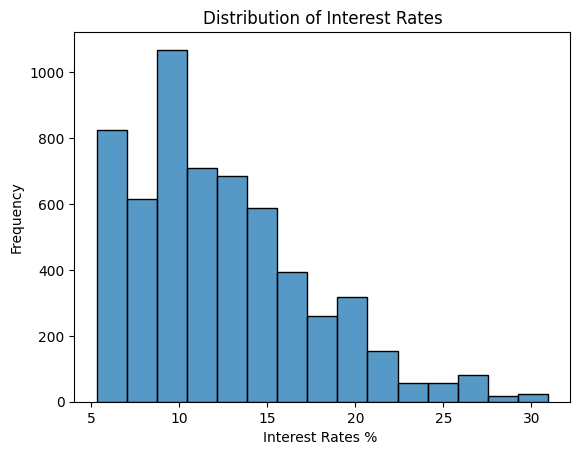

In [ ]:
sns.histplot(data = df, x = "interest_rate", bins = 15, stat = "frequency", kde = False )
plt.xlabel("Interest Rates % ")
plt.title("Distribution of Interest Rates")
plt.show()

Disttribution of Annual Income

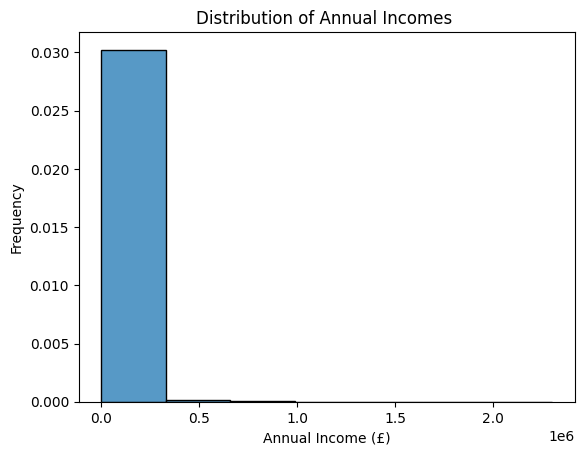

In [ ]:
sns.histplot(data = df, x ="annual_income", bins = 7, stat = "frequency", kde = False)
plt.xlabel("Annual Income (£)")
plt.title("Distribution of Annual Incomes ")
plt.show()

B. Scatterplots
Interest Rate vs Annual Income

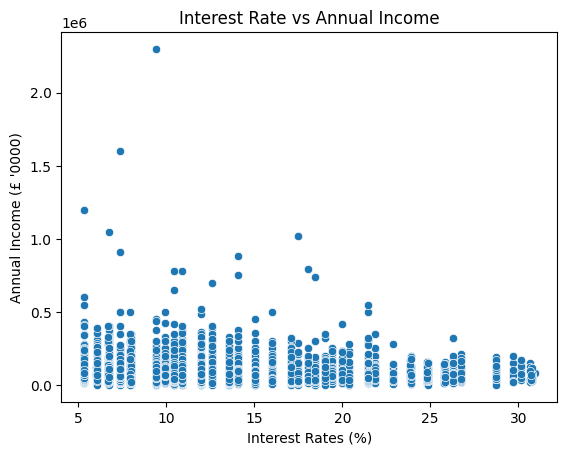

In [ ]:
sns.scatterplot(data = df , x = "interest_rate", y = "annual_income")
plt.ylabel("Annual Income (£ '0000)")
plt.xlabel("Interest Rates (%)")
plt.title("Interest Rate vs Annual Income")
plt.show()

Interest Rate vs Debt to Income

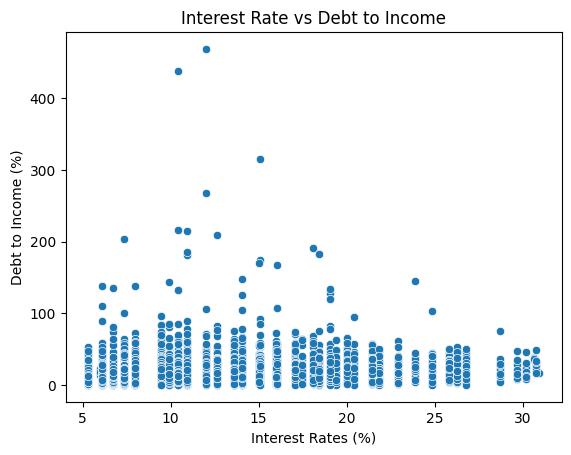

In [ ]:
sns.scatterplot(data = df, x = "interest_rate", y = "debt_to_income")
plt.ylabel("Debt to Income (%)")
plt.xlabel("Interest Rates (%)")
plt.title("Interest Rate vs Debt to Income")
plt.show()

C. Boxplots

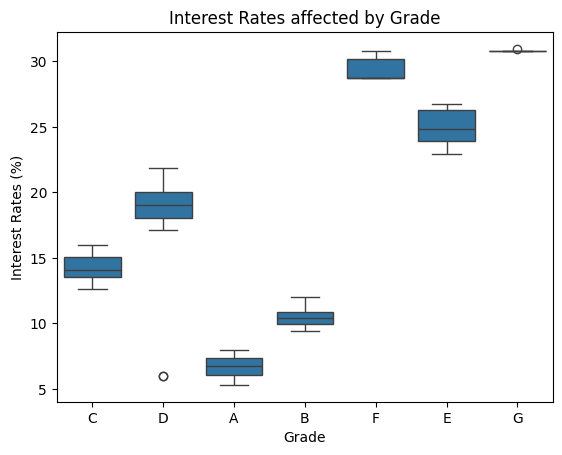

In [ ]:
sns.boxplot(data = df, x = "grade", y = "interest_rate")
plt.ylabel("Interest Rates (%)")
plt.xlabel("Grade")
plt.title("Interest Rates affected by Grade")
plt.show()

Interest Rate by Verified Income

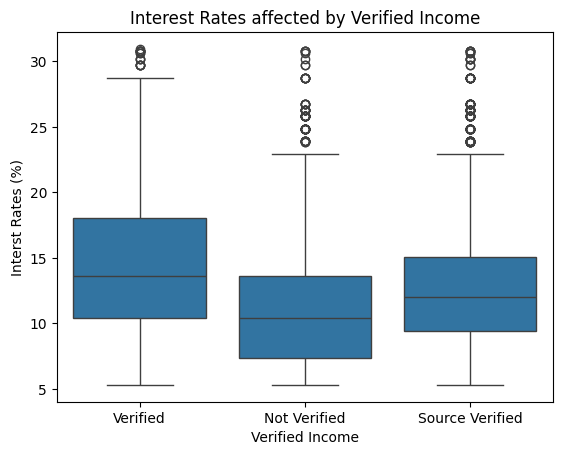

In [ ]:
sns.boxplot( data = df, x = "verified_income", y = "interest_rate")
plt.ylabel("Interst Rates (%)")
plt.xlabel("Verified Income")
plt.title("Interest Rates affected by Verified Income")
plt.show()

Interest Rates affected by Homeownership

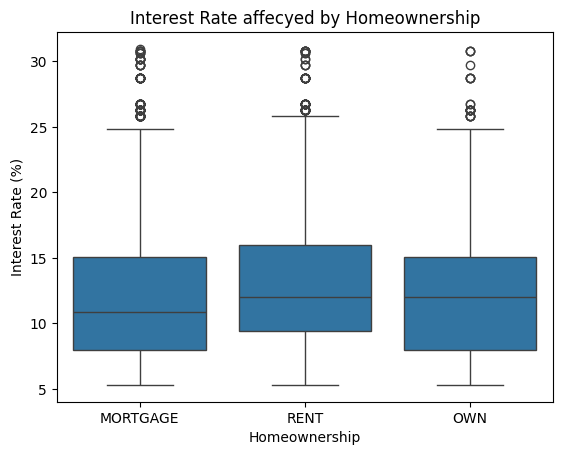

In [ ]:
sns.boxplot(data = df, x = "homeownership", y = "interest_rate")
plt.ylabel("Interest Rate (%)")
plt.xlabel("Homeownership")
plt.title("Interest Rate affecyed by Homeownership")
plt.show()

B.3 Derived Variables
a)

In [ ]:
variable = (New_df["total_credit_limit"]== 0)
value_if_true = 0

In [ ]:
value_if_false = New_df["total_credit_utilized"] / New_df["total_credit_limit"]

In [ ]:
New_df["credit_util"] = np.where(variable, value_if_true, value_if_false)

In [ ]:
New_df

,interest_rate,verified_income,debt_to_income,total_credit_utilized,total_credit_limit,public_record_bankrupt,loan_purpose,term,credit_checks,issue_month,annual_income,loan_amount,grade,emp_length,homeownership,credit_util
0,14.07,Verified,18.01,38767,70795,0,moving,60,6,Mar-2018,90000.0,28000,C,3.0,MORTGAGE,0.547595
1,12.61,Not Verified,5.04,4321,28800,1,debt_consolidation,36,1,Feb-2018,40000.0,5000,C,10.0,RENT,0.150035
2,17.09,Source Verified,21.15,16000,24193,0,other,36,4,Feb-2018,40000.0,2000,D,3.0,RENT,0.661348
3,6.72,Not Verified,10.16,4997,25400,0,debt_consolidation,36,0,Jan-2018,30000.0,21600,A,1.0,RENT,0.196732
4,14.07,Verified,57.96,52722,69839,0,credit_card,36,7,Mar-2018,35000.0,23000,C,10.0,RENT,0.754908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.35,Source Verified,22.28,77963,199195,1,other,36,5,Jan-2018,108000.0,24000,A,10.0,RENT,0.391390
9996,19.03,Verified,32.38,101571,382061,0,debt_consolidation,36,1,Feb-2018,121000.0,10000,D,8.0,MORTGAGE,0.265850
9997,23.88,Verified,45.26,95421,346402,0,debt_consolidation,36,0,Feb-2018,67000.0,30000,E,10.0,MORTGAGE,0.275463
9998,5.32,Source Verified,11.99,27641,294475,0,other,36,1,Feb-2018,80000.0,24000,A,1.0,MORTGAGE,0.093865


b)

In [ ]:
New_df["bankruptcy_dummy"] = (New_df["public_record_bankrupt"] >= 1).astype(int)

In [ ]:
print(New_df["bankruptcy_dummy"].value_counts())

bankruptcy_dummy
0    8785
1    1215
Name: count, dtype: int64


Part C: Regression Analysis
A) Model 1:Simple Liner Regression

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
simple_reg = smf.ols("interest_rate~debt_to_income", data = New_df).fit()

In [ ]:
print(simple_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     204.2
Date:                Mon, 12 Jan 2026   Prob (F-statistic):           7.05e-46
Time:                        23:31:37   Log-Likelihood:                -30105.
No. Observations:                9976   AIC:                         6.021e+04
Df Residuals:                    9974   BIC:                         6.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.5114      0.081    142.

B.  Model 2:Simple Liner Regression

In [ ]:
simple_reg = smf.ols("interest_rate~bankruptcy_dummy", data = New_df).fit()

In [ ]:
print(simple_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     23.22
Date:                Mon, 12 Jan 2026   Prob (F-statistic):           1.47e-06
Time:                        23:31:37   Log-Likelihood:                -30274.
No. Observations:               10000   AIC:                         6.055e+04
Df Residuals:                    9998   BIC:                         6.057e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.3380      0.053  

C. Model 3: Categorical Variable Regression

In [ ]:
#D1 = Source Verified, D2 = Verified

In [ ]:
New_df["D_SourceVerified"] = (New_df["verified_income"] =="Source Verified").astype(int)

In [ ]:
New_df["D_Verified"] = (New_df["verified_income"] =="Verified").astype(int)

In [ ]:
#Dependent Variable (y) = interest_rate
#Independant Variable (x) = D_SourceVerified, D_Verified

In [ ]:
y = New_df["interest_rate"]
x = New_df[["D_SourceVerified", "D_Verified"]]
x = sm.add_constant(x)

In [ ]:
model = sm.OLS(y , x).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     315.9
Date:                Mon, 12 Jan 2026   Prob (F-statistic):          8.92e-134
Time:                        23:31:37   Log-Likelihood:                -29979.
No. Observations:               10000   AIC:                         5.996e+04
Df Residuals:                    9997   BIC:                         5.999e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.0995      0.081  

Compute the Average

In [ ]:
avg_int_unverified = New_df[New_df["verified_income"] == "Not Verified"]["interest_rate"].mean()

In [ ]:
print(avg_int_unverified)

11.099457429048414


D. Model 4:Multiple Regression

In [ ]:
cols_to_use = ["interest_rate", "debt_to_income", "credit_util", "bankruptcy_dummy"]
df_reg = New_df[cols_to_use].dropna()

In [ ]:
x = df_reg[["debt_to_income", "credit_util", "bankruptcy_dummy"]]
y = df_reg["interest_rate"]

In [ ]:
x = sm.add_constant(x)

In [ ]:
model = sm.OLS(y,x).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     279.9
Date:                Mon, 12 Jan 2026   Prob (F-statistic):          1.85e-174
Time:                        23:31:37   Log-Likelihood:                -29803.
No. Observations:                9976   AIC:                         5.961e+04
Df Residuals:                    9972   BIC:                         5.964e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.8708      0.102  